# Optimizing Loan Approval Processes: A Data-Driven Approach

### Domain: Banking

## Introduction:

The financial industry continually seeks ways to optimize loan approval processes, recognizing the pivotal role they play in ensuring a balance between risk management and financial inclusion. In this project, "Optimizing Loan Approval Processes: A Data-Driven Approach," we delve into the intricate dynamics of loan approval by leveraging a comprehensive dataset of loan applicants. Our goal is to unearth key factors influencing loan approval decisions, providing actionable insights to enhance the accuracy and efficiency of the approval process, while mitigating risks for both financial institutions and potential borrowers.

## Objectives:

1. **Identify Key Factors:** Uncover and analyze the primary factors influencing loan approval decisions, recognizing their impact on the overall process.
2. **Optimize Approval Process:** Deliver recommendations aimed at streamlining and improving the accuracy of the loan approval process, enhancing operational efficiency.
3. **Risk Assessment:** Evaluate the risk profiles associated with different applicant types, providing insights to inform better decision-making.
4. **Demographic Analysis:** Investigate how various demographic factors contribute to the nuances of loan approval decisions.
5. **Financial Health Indicators:** Assess the role of applicants' financial health in influencing the loan approval process.
6. **Asset Analysis:** Examine the impact of different types of assets on the likelihood of loan approval.

## Data Processing:

**Data:** capstone_cohort2_synthetic_loan_data.sql: This Dataset contains details of Loans Applied 

**Data Dictionary:**
- **loan_id:** Unique identifier for the loan application.
- **gender:** Gender of the applicant ['Male', 'Female', 'Other'].
- **age:** Age of the applicant.
- **marital_status:** Marital status of the applicant ['Married', 'Single', 'Divorced', 'Widowed'].
- **no_of_dependents:** Number of people dependent on the applicant.
- **educational_level:** Highest level of education achieved by the applicant ['High School', 'Bachelor', 'Master', 'PhD', 'Other'].
- **employment_type:** Type of employment of the applicant ['Salaried', 'Self-employed', 'Government', 'Unemployed'].
- **geographical_location:** Geographical location of the applicant ['Urban', 'Rural'].
- **type_of_residence:** Type of residence the applicant lives in ['Owned', 'Rented', 'With Parents'].
- **income_annum:** Annual income of the applicant.
- **monthly_obligations:** Monthly financial obligations of the applicant.
- **savings_account_balance:** Balance in the savings account of the applicant.
- **investment_portfolio_value:** Value of the applicant’s investment portfolio.
- **insurance_policies:** Value of the applicant’s insurance policies.
- **loan_amount:** Amount of loan requested.
- **loan_term_yrs:** Term of the loan in years.
- **loan_purpose:** Purpose for which the loan is requested ['Home Loan', 'Car Loan', 'Education Loan', 'Personal Loan'].
- **approval_status:** Current status of the loan application ['Approved', 'Rejected'].
- **previous_loan_experience:** Applicant’s experience with previous loans ['Positive', 'Negative', 'None'].
- **credit_history:** Credit history of the applicant ['Good', 'Bad', 'No History'].
- **cibil_score:** Credit score of the applicant.
- **residential_assets_value:** Value of the residential assets owned by the applicant.
- **commercial_assets_value:** Value of the commercial assets owned by the applicant.
- **luxury_assets_value:** Value of the luxury assets owned by the applicant.
- **bank_asset_value:** Value of assets held at the bank by the applicant.
- **property_ownership:** Ownership status of property by the applicant ['Owned', 'Rented'].

Given dataset **capstone_cohort2_synthetic_loan_data.sql** was imported to MySQL Workbench and the below mentioned columns were added for further ease of Analysis using given SQL Script:

- **gender_range:** In this column given Age of the applicant was partitioned in groups of '18-30', '30-45', '45-55' & '> 55'.
- **income_range:** In this column given Annual Income of the applicant was partitioned in groups of '3-10 Lakh', '10-15 Lakh' & '> 15 Lakh'.
- **monthly_obligations_range:** In this column given monthly_obligations of the applicant was partitioned in groups of '10K-20K', '20K-30K', '30K-40K' & '> 40K'.
- **savings_account_balance_range:** In this column given savings_account_balance of the applicant was partitioned in groups of '10K-50K', '50K-1Lakh', '1-2Lakh', '2-3Lakh', '3-4Lakh' & '> 4Lakh'.
- **investment_portfolio_value_range:** In this column given investment_portfolio_value of the applicant was partitioned in groups of '<1 Lakh', '1- 5Lakh', '5-10Lakh' & '>10 Lakh'.
- **insurance_policies_range:** In this column given insurance_policies of the applicant was partitioned in groups of '<1 Lakh', '1-10Lakh', '10-20Lakh', '20-30Lakh', '30-40Lakh' & '>40 Lakh'.
- **loan_amount_range:** In this column given loan_amount of the applicant was partitioned in groups of '<10Lakh', '10-20Lakh', '20-50Lakh', '50-70Lakh', '70L-1 Crore', '1-2 Crore' & '>2 Crore'.
- **total_collateral:** New column was created by adding column's residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, property_ownership: Owned

**SQL Script:** Capstone_SQL.sql

This created dataset **sql_cohort_2.loan_data** was imported here:

In [5]:
# After installing pip install pymysql
from pymysql import connect
import pandas as pd

In [6]:
# Connecting the SQL Database to Python
database = connect(host ='localhost',
                  user = 'root',
                  password = 'root',
                  database = 'sql_cohort_2') #capstone_cohort is the schema in Mysql

In [7]:
cur = database.cursor()

In [8]:
query = 'SELECT * FROM sql_cohort_2.loan_data'
cur.execute(query)

2000

In [9]:
df =pd.read_sql(query,database)

C:\Users\kaush\AppData\Local\Temp\ipykernel_10336\3617230008.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pd.read_sql(query,database)


In [10]:
df.shape

(2000, 33)

There are 2000 Rows and 33 Columns in the Dataset.

In [12]:
df.head() # It will display top 5 rows of the dataset

,loan_id,gender,gender_range,marital_status,no_of_dependents,educational_level,employment_type,geographical_location,type_of_residence,income_annum,...,approval_status,previous_loan_experience,credit_history,cibil_score,property_ownership,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_collateral
0,1256,Male,45-55,Married,3,Master,Unemployed,Urban,Rented,1691803,...,Approved,Positive,Fair,604,Owned,11717202,17448639,21245462,602342,62730847.0
1,1697,Male,18-30,Single,4,Bachelor,Salaried,Urban,Rented,1960196,...,Rejected,Negative,Very Good,774,Owned,4070042,23806132,6013621,21663394,59623231.0
2,811,Female,18-30,Married,3,Ph.D.,Salaried,Urban,Owned,965634,...,Approved,Positive,Poor,448,Rented,29492594,26569264,12472493,4637823,73172174.0
3,1232,Male,> 55,Single,2,Bachelor,Salaried,Urban,Owned,1060285,...,Approved,None,Poor,512,Owned,12017676,2334437,15679623,20238221,62287633.0
4,889,Male,18-30,Married,0,Master,Government,Urban,Rented,1424074,...,Approved,None,Poor,405,Rented,24144496,12044298,13294776,16506798,65990368.0


In [13]:
df.tail() #it will display bottom 5 rows of the dataset

,loan_id,gender,gender_range,marital_status,no_of_dependents,educational_level,employment_type,geographical_location,type_of_residence,income_annum,...,approval_status,previous_loan_experience,credit_history,cibil_score,property_ownership,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_collateral
1995,1577,Male,45-55,Married,3,Master,Salaried,Urban,With Parents,1366717,...,Rejected,Negative,Very Good,773,Owned,16601826,6666671,16644939,13658350,70173612.0
1996,736,Female,30-45,Single,4,Master,Government,Urban,Rented,1260297,...,Approved,None,Good,709,Rented,13124663,1146268,6159701,17727600,38158232.0
1997,1871,Female,18-30,Married,4,Master,Salaried,Urban,Owned,1329523,...,Rejected,None,Good,724,Owned,15220688,8288800,16509832,14465204,69705212.0
1998,1283,Female,45-55,Single,1,Master,Salaried,Urban,Rented,1608803,...,Approved,Positive,Fair,585,Rented,22242473,22377927,27231254,26439772,98291426.0
1999,1496,Female,45-55,Widowed,4,Ph.D.,Government,Rural,Owned,1507108,...,Rejected,Positive,Good,671,Rented,22538506,28748442,29778208,1271505,82336661.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_id                           2000 non-null   int64  
 1   gender                            2000 non-null   object 
 2   gender_range                      2000 non-null   object 
 3   marital_status                    2000 non-null   object 
 4   no_of_dependents                  2000 non-null   int64  
 5   educational_level                 2000 non-null   object 
 6   employment_type                   2000 non-null   object 
 7   geographical_location             2000 non-null   object 
 8   type_of_residence                 2000 non-null   object 
 9   income_annum                      2000 non-null   int64  
 10  income_range                      2000 non-null   object 
 11  monthly_obligations               2000 non-null   int64  
 12  monthl

We can see from the above data that there is no NULL Values in data and the datatypes are perfect.

In [15]:
df.duplicated().sum()

0

We observe that there is no duplicate or null values present in the dataset.

Hence, the data is ready for further Analysis.

## Exploratory Data Analysis(EDA):

In [16]:
df.describe()

,loan_id,no_of_dependents,income_annum,monthly_obligations,savings_account_balance,investment_portfolio_value,insurance_policies,loan_amount,loan_term_yrs,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_collateral
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,1000.500000,1.962500,1.161284e+06,24713.938000,248562.417500,502423.681500,2.459021e+06,7.554795e+06,17.690000,661.952000,1.474209e+07,1.492981e+07,1.506253e+07,1.507320e+07,6.989038e+07
std,577.494589,1.408931,4.927902e+05,14501.542447,140880.891834,283925.277438,1.444366e+06,8.403819e+06,8.632854,167.841223,8.693112e+06,8.654069e+06,8.694131e+06,8.689149e+06,2.170400e+07
min,1.000000,0.000000,3.002900e+05,28.000000,10434.000000,59.000000,5.050300e+04,5.044300e+04,5.000000,0.000000,3.332100e+04,2.315000e+04,2.660600e+04,5.800000e+02,1.117992e+07
25%,500.750000,1.000000,7.338300e+05,12031.000000,125477.500000,259495.750000,1.179178e+06,1.963865e+06,10.000000,637.750000,7.063657e+06,7.285670e+06,7.770596e+06,7.470890e+06,5.469922e+07
50%,1000.500000,2.000000,1.177671e+06,24151.000000,247320.000000,498054.000000,2.392622e+06,3.857934e+06,20.000000,711.000000,1.460704e+07,1.485014e+07,1.500647e+07,1.514171e+07,6.938721e+07
75%,1500.250000,3.000000,1.601100e+06,37338.500000,365972.250000,746000.500000,3.726171e+06,1.076056e+07,25.000000,769.000000,2.231857e+07,2.237804e+07,2.244652e+07,2.262699e+07,8.451748e+07
max,2000.000000,4.000000,1.999667e+06,49996.000000,499905.000000,999584.000000,4.999236e+06,2.998656e+07,30.000000,900.000000,2.996553e+07,2.999623e+07,2.999894e+07,2.999680e+07,1.399053e+08


Since it was unable to analyse the pattern in the above result.

Every columns were ploted in a graph as below:

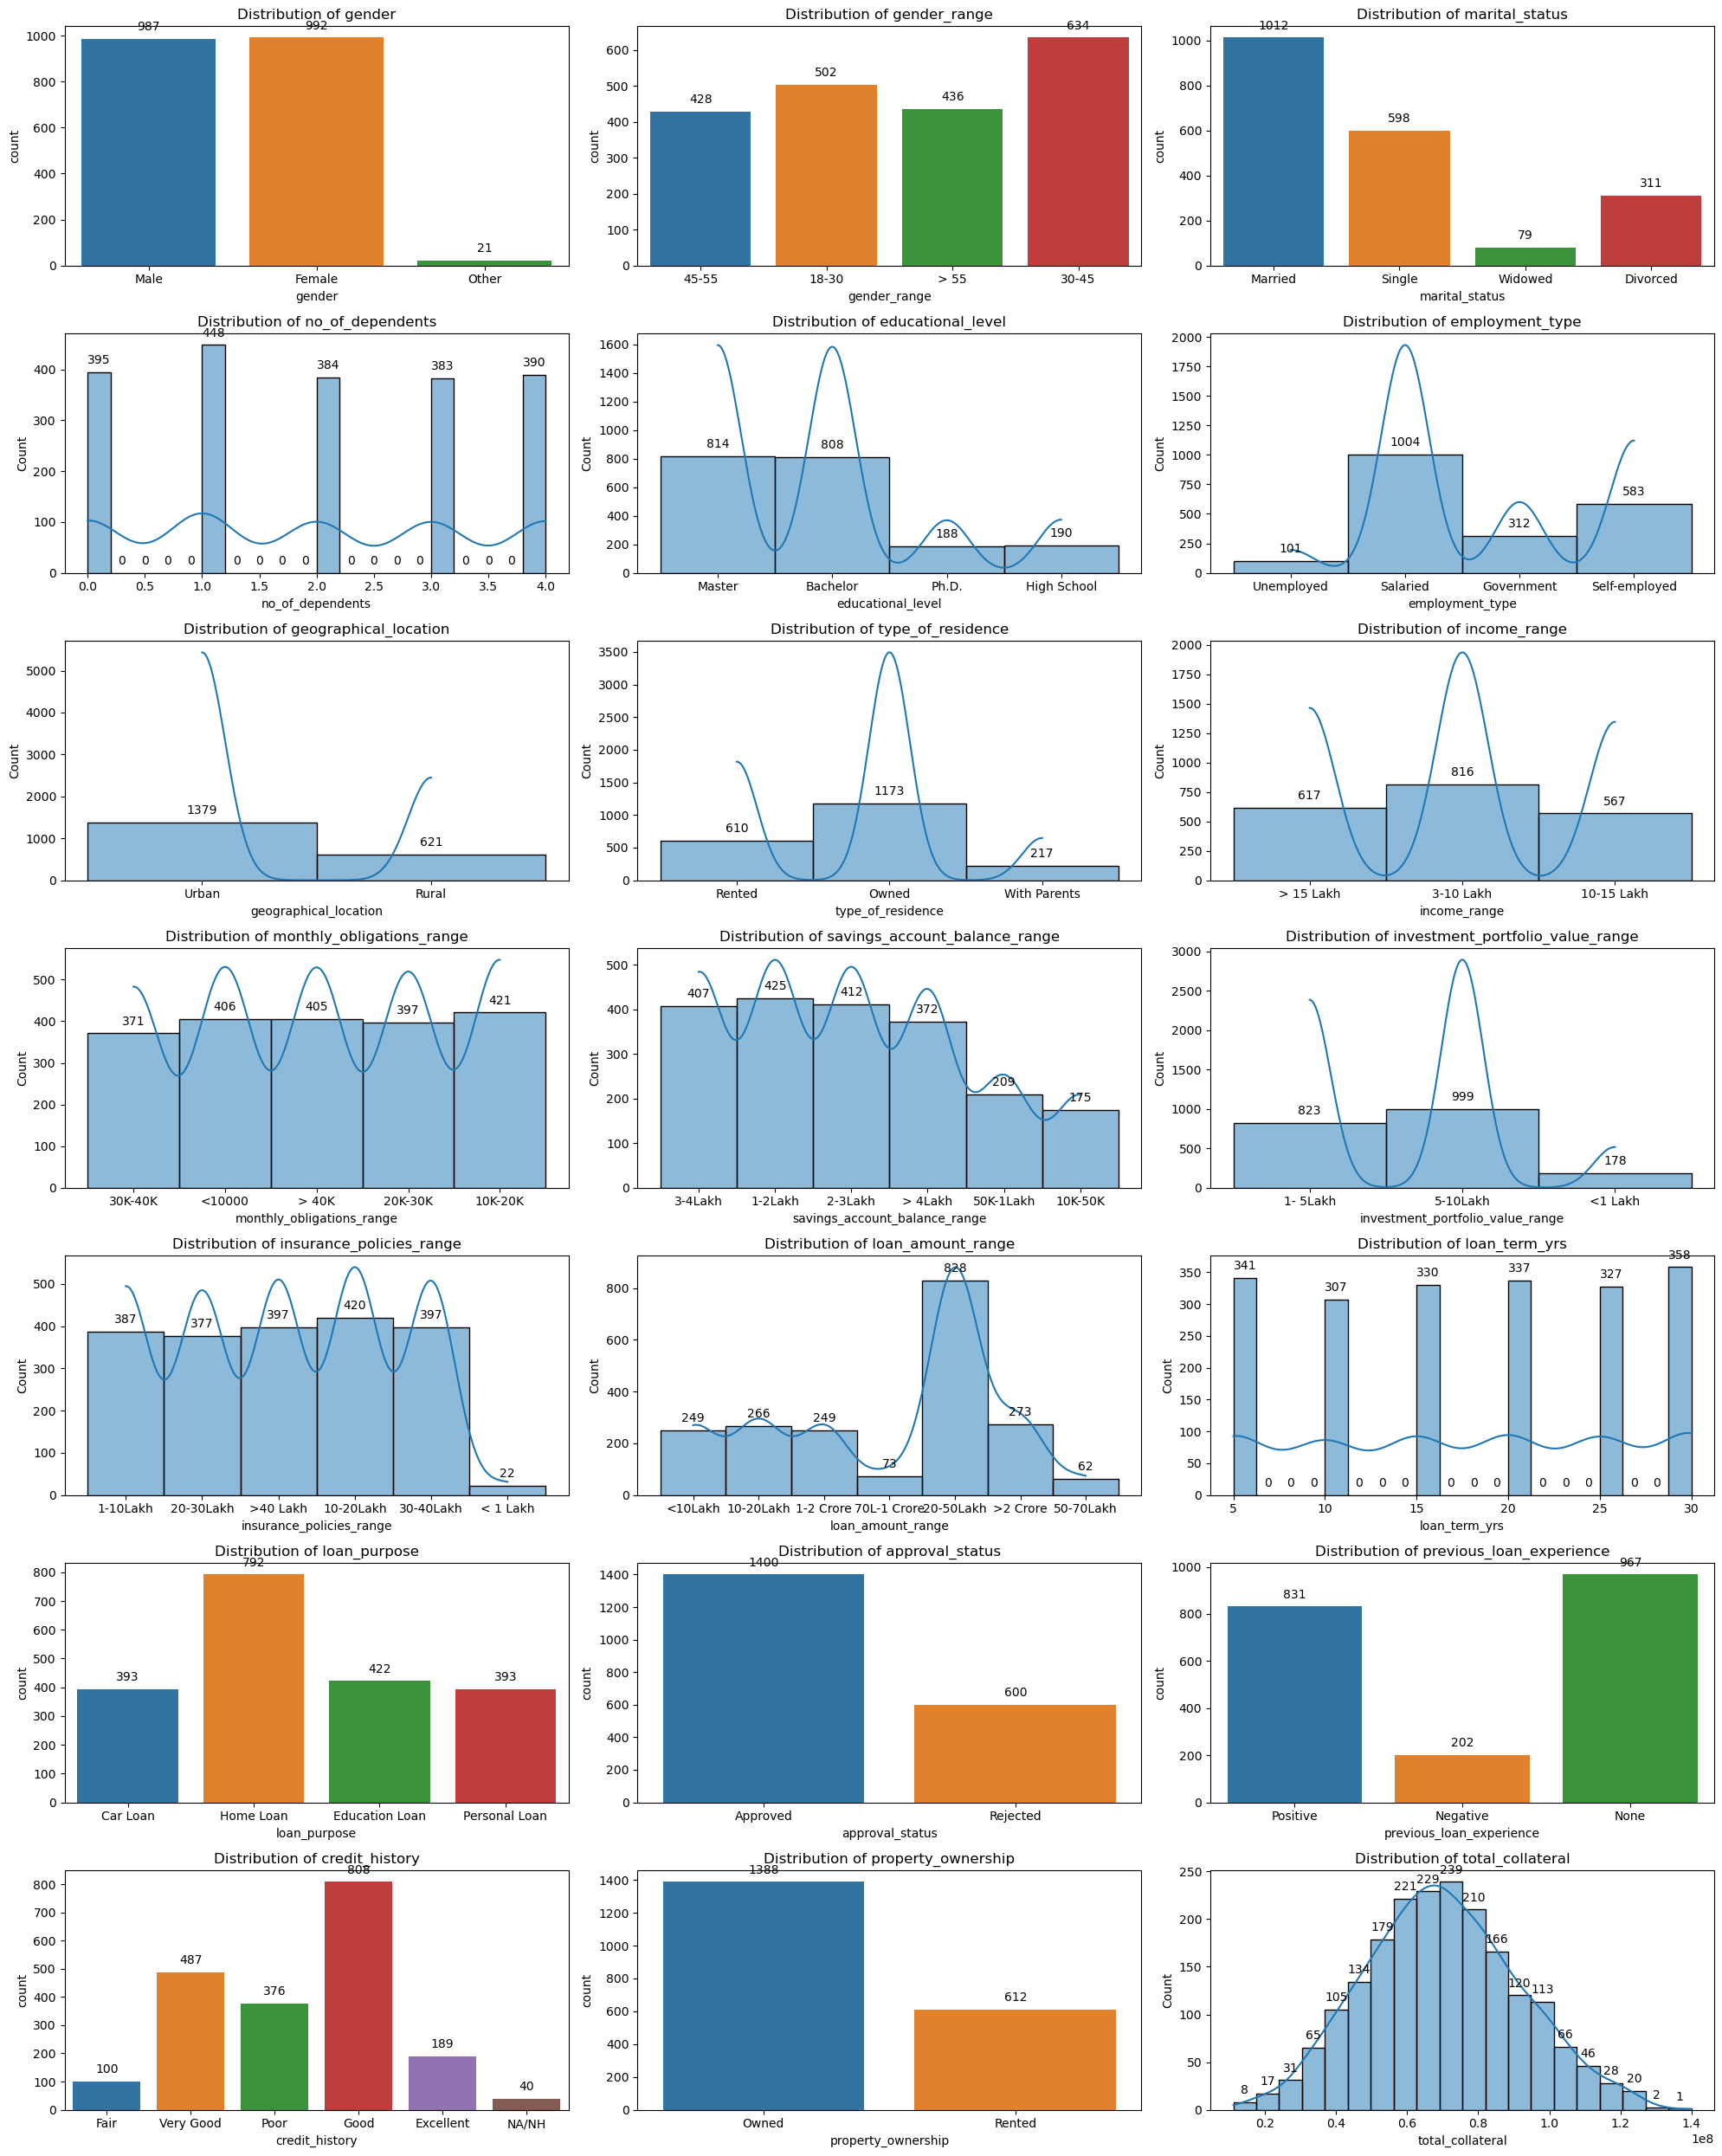

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Creating a 11x2 grid for 21 subplots
fig, axes = plt.subplots(7, 3, figsize=(20, 25))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['gender', 'gender_range', 'marital_status', 'no_of_dependents',
                   'educational_level', 'employment_type', 'geographical_location',
                   'type_of_residence', 'income_range', 'monthly_obligations_range',
                   'savings_account_balance_range', 'investment_portfolio_value_range',
                   'insurance_policies_range', 'loan_amount_range', 'loan_term_yrs',
                   'loan_purpose', 'approval_status', 'previous_loan_experience', 'credit_history',
                   'property_ownership', 'total_collateral']

# Plot each column
for col, ax in zip(columns_to_plot, axes):
    if col in ['gender', 'gender_range', 'marital_status', 'loan_purpose', 'approval_status',
               'previous_loan_experience', 'credit_history', 'property_ownership']:
        plot = sns.countplot(x=col, data=df, ax=ax)
    else:
        plot = sns.histplot(df[col], bins=20, kde=True, ax=ax)

    # Display counts on top of the bars
    for p in plot.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    ax.set_title(f'Distribution of {col}')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


**Customers with a higher chance of Loan Approval:**

1. **Age:** Predominantly within the range of 30-45.
2. **Marital Status:** Married individuals.
3. **Number of Dependents:** Typically have fewer dependents, often one or none.
4. **Educational Level:** Hold a Master's or Bachelor's degree.
5. **Employment Type:** Salaried employees.
6. **Geographical Location:** Primarily from urban areas.
7. **Type of Residence:** Own their residence.
8. **Income Range:** Fall within the range of 3-10 Lakhs.
9. **Savings Account Balance:** Tend to have a savings account balance less than 4 Lakhs.
10. **Investment Portfolio:** Maintain an investment portfolio in the range of 5-10 Lakhs.
11. **Insurance Policies:** Typically have insurance policies greater than 1 Lakh.

This analysis suggests that customers meeting these criteria are more likely to have their loan applications approved. It's important to note that these inferences are based on the observed distributions in the provided plots and may not necessarily imply causation.

In [50]:
df['avg_monthly_expenses_per_dependent'] = df['monthly_obligations'] / df['no_of_dependents']
df['adjusted_monthly_obligations']= df['monthly_obligations']+(df['avg_monthly_expenses_per_dependent']+df['no_of_dependents'])
df['DTI'] = (df['adjusted_monthly_obligations']/df['income_annum'])*100

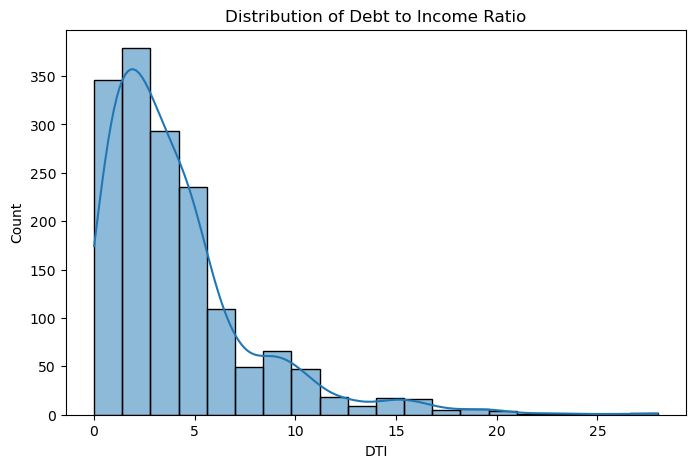

In [51]:
# Distribution of Debt To Income Ratio 
plt.figure(figsize=(8, 5))
sns.histplot(df['DTI'], bins=20, kde=True)
plt.title('Distribution of Debt to Income Ratio')
plt.show()

In [52]:
# Remove the first column which is an index column
df.drop(df.columns[0], axis=1, inplace=True)

# Convert approval_status to a binary variable where 'Approved' is 1 and 'Rejected' is 0
df['approval_status'] = df['approval_status'].map({'Approved': 1, 'Rejected': 0})

# Select numerical columns for correlation
numerical_columns = ['no_of_dependents', 'income_annum', 'monthly_obligations', 'savings_account_balance', 'investment_portfolio_value', 'insurance_policies', 'loan_amount', 'loan_term_yrs', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'total_collateral', 'approval_status']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display the correlation with approval_status
print(correlation_matrix['approval_status'].sort_values(ascending=False))

approval_status               1.000000
total_collateral              0.028100
commercial_assets_value       0.025798
bank_asset_value              0.022370
no_of_dependents              0.012781
luxury_assets_value           0.001878
cibil_score                  -0.001143
insurance_policies           -0.007950
income_annum                 -0.008195
monthly_obligations          -0.009706
residential_assets_value     -0.012004
savings_account_balance      -0.013308
investment_portfolio_value   -0.014416
loan_amount                  -0.015392
loan_term_yrs                -0.039949
Name: approval_status, dtype: float64


__Postive Correlations__:

    - total_collateral
    - commercial_assets_value
    - bank_asset_value
    - no_of_dependents

These columns are positively correlated i.e the likelihood of loan approval is more with these columms

__Negative Correlations__:

    - loan_amount
    - loan_term_yrs
    - investment_portfolio_value
    - cibil_score
    - income_annum
    - savings_account_balance

These columns are associated with a lower likelihood of loan approval.

__No Significat Correlations__:

    - bank_asset_value
    - luxury_assets_value

## Data Visualisation

All The data were imported to Power BI Desktop.
Below Dashboard was created:

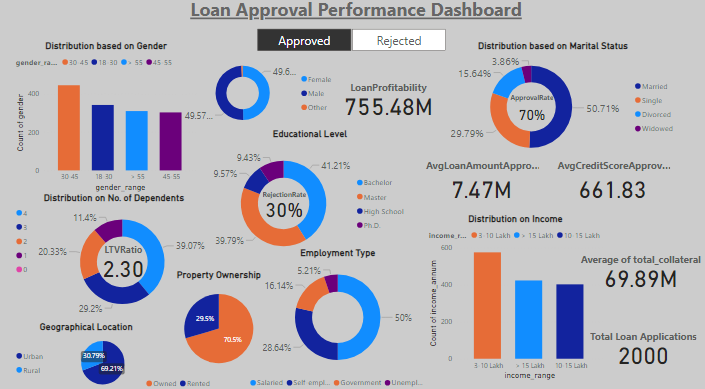

Based on the analysis and the identified correlations, here are some recommendations:

# Recommendations:

### 1. Focus on Collateral and Assets:
__Positive Correlations__: Strengthen the focus on applicants with significant total collateral, commercial assets, and bank assets. These factors seem to be positively associated with loan approval.

### 2. Demographic Considerations:
__Age Group 30-45__: Target applicants within the age group of 30-45, as this demographic appears to have a higher likelihood of loan approval.

__Marital Status__: Consider providing tailored loan products or incentives for married individuals.

__Dependents less than 1__: Applicants with fewer dependents (<=1) have a positive correlation with loan approval, suggesting a lower financial burden.

### 3. Educational Background:
__Educational Level (Masters or Bachelor Degree)__: Applicants with higher education levels (Masters or Bachelor Degree) are more likely to receive loan approval.

### 4. Employment Type:
__Salaried Employees__: Salaried employees seem to have a positive correlation with loan approval. Tailor loan products or incentives to cater to this employment category.

### 5. Geographical Location and Residence Type:
__Urban Geography__: Applicants from urban areas have a higher likelihood of loan approval. Consider geographical targeting in marketing and product offerings.

__Owned Residence__: Applicants with owned residences are more likely to be approved for loans.

### 6. Income and Financial Health:
__Income Range 3-10 Lakhs__: Target applicants with an income in the range of 3-10 Lakhs, as this income bracket shows a positive correlation with loan approval.

__Savings Account Balance less than 4 Lakh__: Applicants with savings account balances less than 4 Lakhs are more likely to receive loan approval.

### 7. Risk Mitigation:
__Cautious Approaches for Negative Correlations__: Be cautious when dealing with applicants with characteristics negatively correlated with loan approval, such as higher loan amounts, longer loan terms, lower investment portfolios, lower CIBIL scores, and lower annual incomes.

### 8. Further Analysis:
__Investigate No Significant Correlations__: Explore reasons why bank_asset_value and luxury_assets_value did not show significant correlations. Further analysis may provide insights into potential factors impacting these variables.

### 9. Customer Engagement:
__Insurance Policies__: Engage with customers who have insurance policies greater than 1 Lakh, as this factor seems positively correlated with loan approval.

### Conclusion:
The above recommendations aim to enhance the accuracy of the loan approval process by targeting applicants with characteristics positively correlated with loan approval and avoiding potential risks associated with negatively correlated factors. Continuous monitoring and periodic updates to these recommendations based on changing trends and customer profiles are advisable.

# Thank You!!!